# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(11927, 11927)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=2000, profit_margin_diff=800)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-03-25 10:52:19,liquid,coincheck,BTC/JPY,0.009,10
1,2020-03-25 10:52:51,coincheck,liquid,BTC/JPY,0.009,-1
2,2020-03-25 10:55:20,liquid,coincheck,BTC/JPY,0.009,10
3,2020-03-25 10:56:10,coincheck,liquid,BTC/JPY,0.009,-2
4,2020-03-25 10:57:30,liquid,coincheck,BTC/JPY,0.009,13
5,2020-03-25 10:57:35,coincheck,liquid,BTC/JPY,0.009,-4
6,2020-03-25 10:57:36,liquid,coincheck,BTC/JPY,0.009,10
7,2020-03-25 10:57:45,coincheck,liquid,BTC/JPY,0.009,-2
8,2020-03-25 10:59:26,liquid,coincheck,BTC/JPY,0.009,10
9,2020-03-25 11:00:04,coincheck,liquid,BTC/JPY,0.009,-2


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-03-25 10:52:19,買い,liquid,741836.0
1,2020-03-25 10:52:19,売り,coincheck,743000.0
2,2020-03-25 10:52:51,買い,coincheck,741919.0
3,2020-03-25 10:52:51,売り,liquid,741783.0
4,2020-03-25 10:55:20,買い,liquid,738508.0
...,...,...,...,...
71,2020-03-25 13:43:35,売り,liquid,732604.0
72,2020-03-25 14:01:00,買い,liquid,737907.0
73,2020-03-25 14:01:00,売り,coincheck,738994.0
74,2020-03-25 14:01:08,買い,coincheck,738531.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
+---------------------+---------------------+
|          レコード数 |               11927 |
+---------------------+---------------------+
|            取引回数 |                  38 |
+---------------------+---------------------+
|            開始日時 | 2020-03-25 10:37:45 |
+---------------------+---------------------+
|            終了日時 | 2020-03-25 14:09:14 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 03:31:29 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.009 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                1000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                 800 |
+---------------------+---------------------+

バックテスト結果
+-------------+---------+
| 開始[JPY]   |   10000 |
+-------------+---------+
| 終了[JPY]   |   10164 |
+-------------+---------+
| 利益[JPY]   |     164 |
+-------------+---------+
| 開始[BTC]   |   0.022 |
+-------------+---------+
| 終了[BTC]  

## グラフ出力

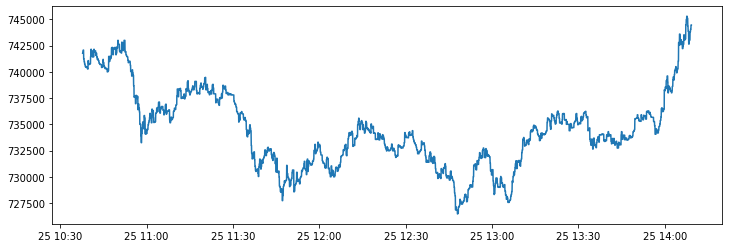

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

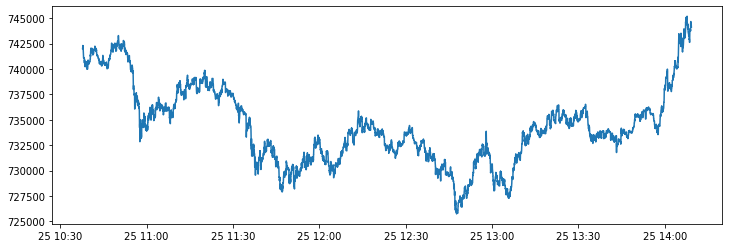

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-03-25 10:30:00,-553,-33,740852,740885,740731,741284
2020-03-25 10:40:00,-342,-207,741294,741500,741333,741675
2020-03-25 10:50:00,-656,-11,738971,738982,738759,739415
2020-03-25 11:00:00,-605,-124,735975,736099,735876,736480
2020-03-25 11:10:00,-343,-298,738167,738465,738250,738592
2020-03-25 11:20:00,-411,-215,738015,738229,738010,738422
2020-03-25 11:30:00,-496,-121,734042,734163,733957,734453
2020-03-25 11:40:00,-430,-171,730842,731014,730797,731227
2020-03-25 11:50:00,-499,-201,730879,731080,730850,731349
